A1


In [24]:
import os
import numpy as np
import matplotlib.pyplot as pyplot
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

# Load the VGG16 model
model = VGG16()

# Print summary of the model
model.summary()

# Extract and print convolutional layer details
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

# Retrieve and normalize filters from the second convolutional layer
filters, bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Visualizing the first 6 filters
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
pyplot.show()

# Print shape of output from convolutional layers
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

# Redefine model to output after the first convolutional layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

# Directory containing images
dataset_path = "/content/drive/MyDrive/criminal_dataset/"  # Update with actual folder name

# List all image files in dataset directory
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('png', 'jpg', 'jpeg'))]

# Process only **one** image
if image_files:
    img_name = image_files[0]  # Pick the first image
    img_path = os.path.join(dataset_path, img_name)
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Compute feature maps
    features = model.predict(img)

    # Plot feature maps
    fig = pyplot.figure(figsize=(20, 15))
    for i in range(1, min(features.shape[3] + 1, 64)):  # Limiting to 64 feature maps
        pyplot.subplot(8, 8, i)
        pyplot.imshow(features[0, :, :, i - 1], cmap='gray')
    pyplot.show()

    # Extract feature maps from different VGG16 blocks
    model2 = VGG16()
    blocks = [2, 5, 9, 13, 17]  # Indices of convolutional blocks
    outputs = [model2.layers[i].output for i in blocks]
    model2 = Model(inputs=model2.inputs, outputs=outputs)

    # Compute feature maps from different blocks
    feature_maps = model2.predict(img)

    for block, fmap in zip(blocks, feature_maps):
        fig = pyplot.figure(figsize=(20, 15))
        fig.suptitle(f"BLOCK_{block}", fontsize=20)
        for i in range(1, min(fmap.shape[3] + 1, 64)):  # Limiting to 64 feature maps
            pyplot.subplot(8, 8, i)
            pyplot.imshow(fmap[0, :, :, i - 1], cmap='gray')
        pyplot.show()
else:
    print("No images found in the dataset directory!")


Output hidden; open in https://colab.research.google.com to view.

A2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
dataset_path = "/content/drive/MyDrive/criminal_dataset/"  # Update with actual folder name
print(os.listdir(dataset_path))  # Check if files are there

['B02982.jpg', 'B03062.jpg', 'B03019.jpg', 'B02991.jpg', 'B03005.jpg', 'B02997.jpg', 'B03040.jpg', 'B03004.jpg', 'B03054.jpg', 'B03023.jpg', 'B02995.jpg', 'B03164.jpg', 'B03141.jpg', 'B03120.jpg', 'B03174.jpg', 'B03084.jpg', 'B03069.jpg', 'B03101.jpg', 'B03158.jpg', 'B03186.jpg', 'B03118.jpg', 'B03066.jpg', 'B03191.jpg', 'B03234.jpg', 'B03208.jpg', 'B03244.jpg', 'B03278.jpg', 'B03296.jpg', 'B03292.jpg', 'B03299.jpg', 'B03254.jpg', 'B03340.jpg', 'B03368.jpg', 'B03336.jpg', 'B03314.jpg', 'B03327.jpg', 'B03301.jpg', 'B03386.jpg', 'B03303.jpg', 'B03381.jpg', 'B03363.jpg', 'B03335.jpg', 'B03378.jpg', 'B03541.jpg', 'B03462.jpg', 'B03495.jpg', 'B03436.jpg', 'B03392.jpg', 'B03390.jpg', 'B03401.jpg', 'B03524.jpg', 'B03536.jpg', 'B03414.jpg', 'B03501.jpg', 'B03439.jpg', 'B03490.jpg', 'B03459.jpg', 'B03547.jpg', 'B03438.jpg', 'B03593.jpg', 'B03567.jpg', 'B03620.jpg', 'B03708.jpg', 'B03596.jpg', 'B03678.jpg', 'B03674.jpg', 'B03705.jpg', 'B03643.jpg', 'B03627.jpg', 'B03577.jpg', 'B03557.jpg', 'B036

X_train shape: (1694, 28, 28, 1)
X_test shape: (424, 28, 28, 1)


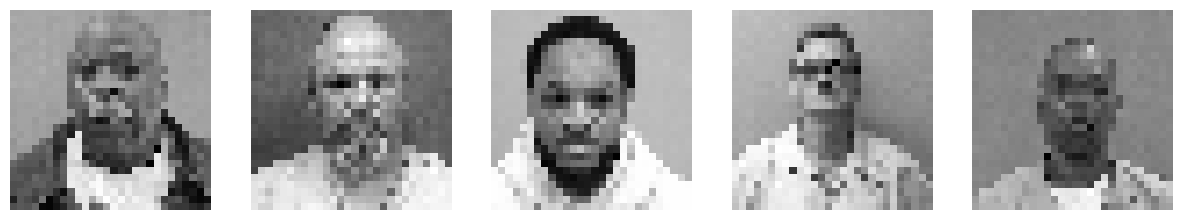

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,873 (874.50 KB)

 Trainable params: 223,873 (874.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9708 - loss: 0.1370
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.0566e-10
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2596e-10
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3072e-09
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9151e-10
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.7310e-09
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.0989e-10
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.6390e-10
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.1531e-09
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.2994e-10


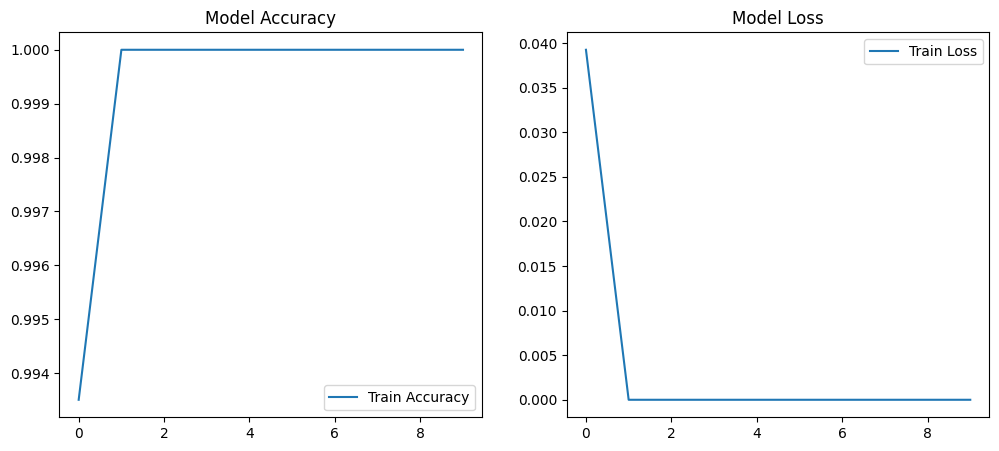

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset path
dataset_path = "/content/drive/MyDrive/criminal_dataset/"  # Update with actual folder name

# Function to load and preprocess images
def load_images(folder, img_size=(28, 28)):
    images = []
    filenames = os.listdir(folder)
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
    return np.array(images), filenames

# Load images
X, filenames = load_images(dataset_path)
X = X.reshape(X.shape[0], 28, 28, 1)  # Reshape for CNN input

# Generate dummy labels since dataset is unlabeled
y_dummy = np.zeros((X.shape[0],))  # Create dummy labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.2, random_state=42)

# Print dataset shape
print(f"X_train shape: {X_train.shape}")  # (num_train, 28, 28, 1)
print(f"X_test shape: {X_test.shape}")  # (num_test, 28, 28, 1)

# Function to display images
def show_images(images, num=5):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

# Show first 5 train images
show_images(X_train, num=5)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Change softmax to sigmoid for binary dummy labels
])

# Compile model (use binary_crossentropy since we have dummy labels)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Convert dataset to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(100)

# Train the model without real labels
history = model.fit(train_dataset, epochs=10)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
